In [ ]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/data1-Nancy.csv")

In [11]:
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [12]:
#data1.drop(columns="July_Payment_Status")

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from random import choice
LR=LogisticRegression(penalty="l2", solver="liblinear", C=0.8, max_iter=100)
LR1= LR.fit(Xtrain,Ytrain)
y_pred=LR1.predict(Xtest)
LR1.score(Xtest,Ytest)

0.7947265199389846

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {"penalty":("l1","l2"),
              "C":np.linspace(0,1,10),
              "solver":("newton-cg","lbfgs","liblinear","sag","saga","warn")}
LR2=LogisticRegression()

In [ ]:
GS = GridSearchCV(LR1, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

In [10]:
print(GS.best_params_)
print(GS.best_score_)

{'C': 0.8888888888888888, 'penalty': 'l2', 'solver': 'liblinear'}
0.7930327198604805


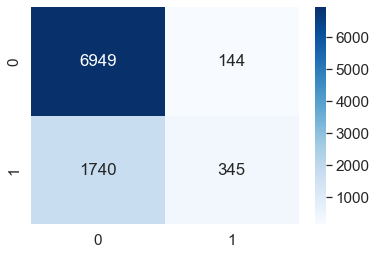

In [21]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [19]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.799747  0.979698  0.880623      7093
           1   0.705521  0.165468  0.268065      2085

    accuracy                       0.794727      9178
   macro avg   0.752634  0.572583  0.574344      9178
weighted avg   0.778341  0.794727  0.741466      9178

